In [8]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def convert_to_grayscale(image_path):
    """
    Convert the image to grayscale.

    Parameters:
        image_path (str): Path to the input image.

    Returns:
        grayscale_image (PIL.Image.Image): Grayscale image.
    """
    image = Image.open(image_path).convert('L')
    return image

def extract_value_palette(grayscale_image, num_values=5):
    """
    Extract a palette of distinct grayscale values from the image using K-means clustering.

    Parameters:
        grayscale_image (PIL.Image.Image): Grayscale image.
        num_values (int): Number of grayscale values/clusters to extract.

    Returns:
        palette (numpy.ndarray): Array of grayscale values.
        labels (numpy.ndarray): Array of cluster labels for each pixel.
    """
    # Convert the grayscale image to a numpy array and reshape for clustering
    gray_array = np.array(grayscale_image).reshape(-1, 1)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=num_values, random_state=42)
    kmeans.fit(gray_array)

    # Get the cluster centers (palette) and labels
    palette = kmeans.cluster_centers_.flatten().astype(np.uint8)
    labels = kmeans.labels_.reshape(grayscale_image.size[1], grayscale_image.size[0])

    # Sort the palette and reorder labels accordingly
    sorted_indices = np.argsort(palette)
    sorted_palette = palette[sorted_indices]

    # Map old labels to new sorted labels
    label_mapping = {old: new for new, old in enumerate(sorted_indices)}
    sorted_labels = np.vectorize(label_mapping.get)(labels)

    return sorted_palette, sorted_labels

def display_value_palette(palette):
    """
    Display the palette of grayscale values.

    Parameters:
        palette (numpy.ndarray): Array of grayscale values.
    """
    num_values = len(palette)
    palette_image = np.zeros((50, 50 * num_values), dtype=np.uint8)

    for i, value in enumerate(palette):
        palette_image[:, i * 50:(i + 1) * 50] = value

    plt.figure(figsize=(num_values, 2))
    plt.imshow(palette_image, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.show()

def save_palette(palette, output_path="value_palette.png"):
    """
    Save the palette as an image.

    Parameters:
        palette (numpy.ndarray): Array of grayscale values.
        output_path (str): Path to save the palette image.
    """
    num_values = len(palette)
    palette_image = np.zeros((50, 50 * num_values), dtype=np.uint8)

    for i, value in enumerate(palette):
        palette_image[:, i * 50:(i + 1) * 50] = value

    output_image = Image.fromarray(palette_image)
    output_image.save(output_path)
    print(f"Palette saved to {output_path}")

def generate_clustered_image(grayscale_image, palette, labels):
    """
    Generate a new image with clusters drawn as regions with their respective grayscale values.

    Parameters:
        grayscale_image (PIL.Image.Image): Original grayscale image.
        palette (numpy.ndarray): Array of grayscale values.
        labels (numpy.ndarray): Array of cluster labels for each pixel.

    Returns:
        clustered_image (PIL.Image.Image): Image with clustered regions.
    """
    clustered_array = np.zeros_like(np.array(grayscale_image), dtype=np.uint8)

    for i, value in enumerate(palette):
        clustered_array[labels == i] = value

    clustered_image = Image.fromarray(clustered_array)
    return clustered_image


/home/papace/.pyenv/versions/lewagon_current/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


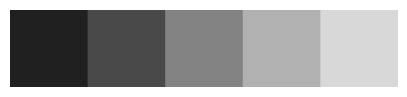

Palette saved to value_palette.png
Clustered image saved to clustered_image.png
Extracted palette values: [ 32  74 132 177 216]


In [10]:

image_path = '../images/_DSC8666-2.jpg'


if not os.path.isfile(image_path):
    raise FileNotFoundError(f"The image at path '{image_path}' was not found.")

# Number of grayscale values/clusters desired
num_values = 5

grayscale_image = convert_to_grayscale(image_path)
palette, labels = extract_value_palette(grayscale_image, num_values=num_values)
display_value_palette(palette)

save_palette(palette, output_path="value_palette.png")

clustered_image = generate_clustered_image(grayscale_image, palette, labels)
clustered_image.save("clustered_image.png")
print("Clustered image saved to clustered_image.png")

clustered_image.show()

print(f"Extracted palette values: {palette}")